In [1]:
import os
import argparse
import torch
import random
import numpy as np
from tqdm import tqdm
from torch.utils.data import random_split
import matplotlib.pyplot as plt

from model.crnn import CRNN

from dataset import DatasetImg
from tools.utils import *
from tools.StrLabelConverter import *
from trainer import *



c:\Users\tandat17z\anaconda3\envs\env_tandat17z\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
device = ( "cuda" if torch.cuda.is_available() else "cpu")
print("---------------------------------------------------")
print(f"Using {device} device")
print("---------------------------------------------------")

with open(os.path.join('data/alphabet.txt'), 'r', encoding='utf-8') as f:
    alphabet = f.read().rstrip()
# print(alphabet)
converter = StrLabelConverter(alphabet, ignore_case=False)
converter.numClass

---------------------------------------------------
Using cpu device
---------------------------------------------------


151

In [3]:
model = CRNN(converter.numClass, 256, dropout=0.4).to(device)

criterion = torch.nn.CTCLoss().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)


>>>> use Crnn-------------



In [4]:
checkpoint = 'checkpoint/checkpoint-15.pth.tar'
if checkpoint:
    checkpoint = torch.load(checkpoint, map_location=torch.device(device))
    model.load_state_dict(checkpoint['model_state_dict'])
    epoch = checkpoint['epoch']
    log = checkpoint['log']

In [5]:
from tester import Tester

tester = Tester(model, criterion, converter)

# Dự đoán nhiều ảnh

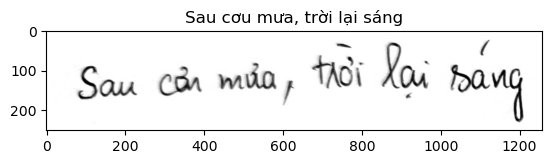

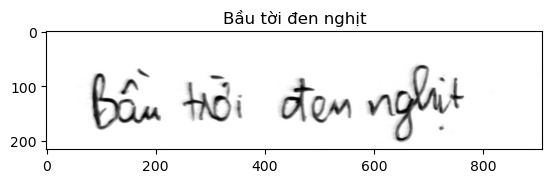

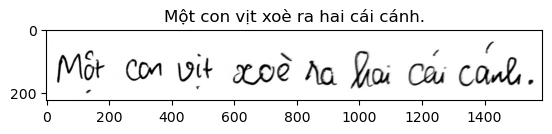

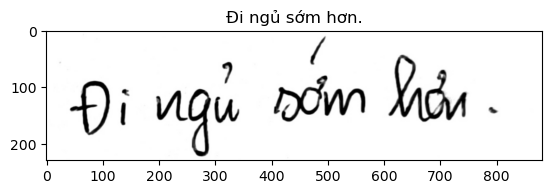

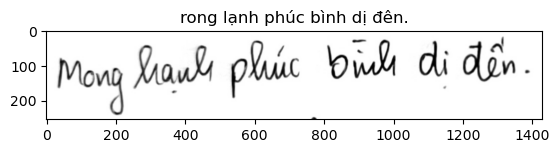

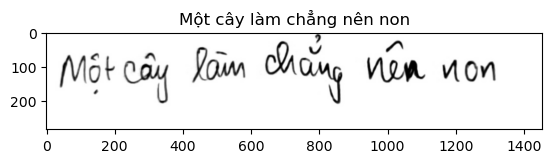

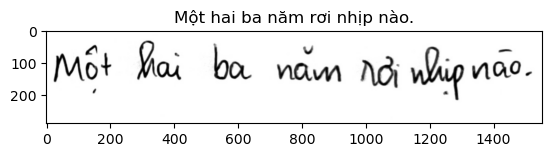

In [8]:
from PIL import Image
import matplotlib.pyplot as plt

root = 'data/testModel/img'
for path in os.listdir(root):
        imgpath = root + '/' + path
        img = Image.open(imgpath)
        plt.imshow(img)
        plt.title(tester.predict(imgpath))
        plt.show()
        
        